In [1]:
#importing libraiires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn.metrics import accuracy_score


In [2]:
#importing data
train_data  = pd.read_csv("data/train_data.csv")
train_data.columns = [  i.lower()   for i in train_data.columns ]
train_data.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#removing loean id 
train_data.drop(columns=['loan_id'],inplace=True)
#showing none values

print("None values  :\n",train_data.isna().sum())
#getting information about the size of training data
train_data.shape

None values  :
 gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


(614, 12)

In [4]:
# we have many none values we will fill them by mode cause it's not sentible about outlayers
columns_with_missing_values = [i for i,j in train_data.isna().any().items() if j]
for i in columns_with_missing_values:
    train_data[i].fillna( train_data[i].mode().values[0],inplace=True)

In [5]:
print("Unique values in depenents :\n",train_data['dependents'].unique())
#it's look that we have a problem in dependents columns
train_data['dependents'] = train_data['dependents'].apply(lambda x: 3 if x == '3+' else int(x)).astype('int')
train_data.dtypes

Unique values in depenents :
 ['0' '1' '2' '3+']


gender                object
married               object
dependents             int64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

<AxesSubplot:>

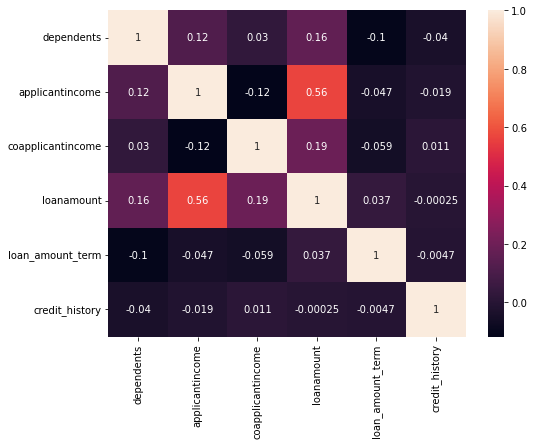

In [6]:
plt.figure(figsize=(8,6))
corr = train_data.select_dtypes(exclude=['object']).corr()
heatmap(corr,annot=True)
#this is no string correlation between variables


Text(0.5, 1.0, 'Loan Status Distribution')

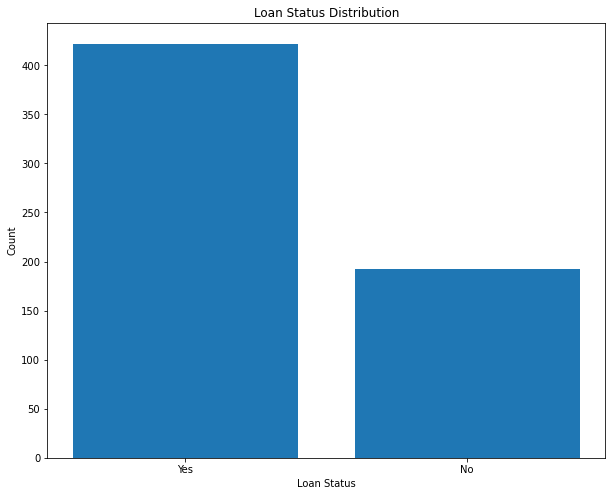

In [7]:
yes_counts  =train_data['loan_status'] [train_data['loan_status'] == 'Y'].count()
no_counts = train_data['loan_status'] [train_data['loan_status'] == 'N'].count()
# Create data and labels
data = [yes_counts, no_counts]
labels = ['Yes', 'No']

plt.figure(figsize=(10,8))
# Create histogram
plt.bar(labels,data)

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')


In [8]:
le = LabelEncoder()
labels= []
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = le.fit_transform(train_data[column])
    labels.append({ column : le.classes_})

train_data['credit_history'] = train_data['credit_history'].astype('int')

In [9]:
train_data

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [10]:
def data_preprocessing(df):
    df.columns = [  i.lower()   for i in df.columns ]
    df.drop(columns=['loan_id'],inplace=True)
    columns_with_missing_values = [i for i,j in df.isna().any().items() if j]
    for i in columns_with_missing_values:
        df[i].fillna( df[i].mode().values[0],inplace=True)
    df['dependents'] = df['dependents'].apply(lambda x: 3 if x == '3+' else int(x)).astype('int')
    le = LabelEncoder()
    labels= []
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
        labels.append(le.classes_)
    return df
    

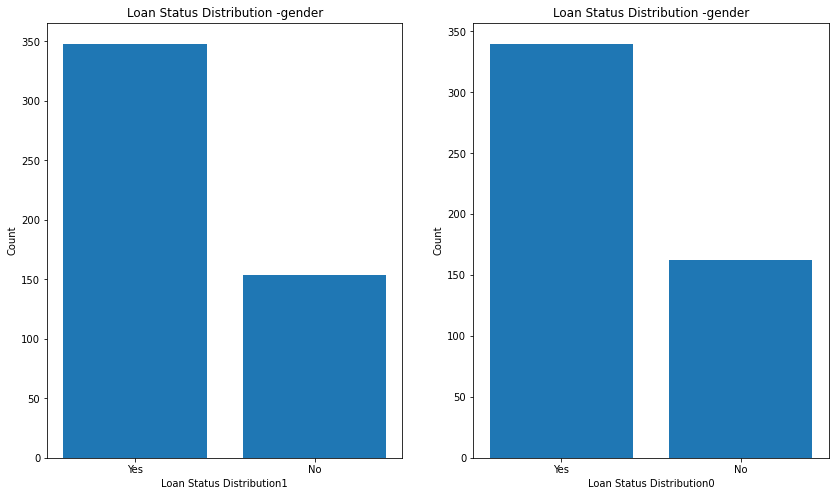

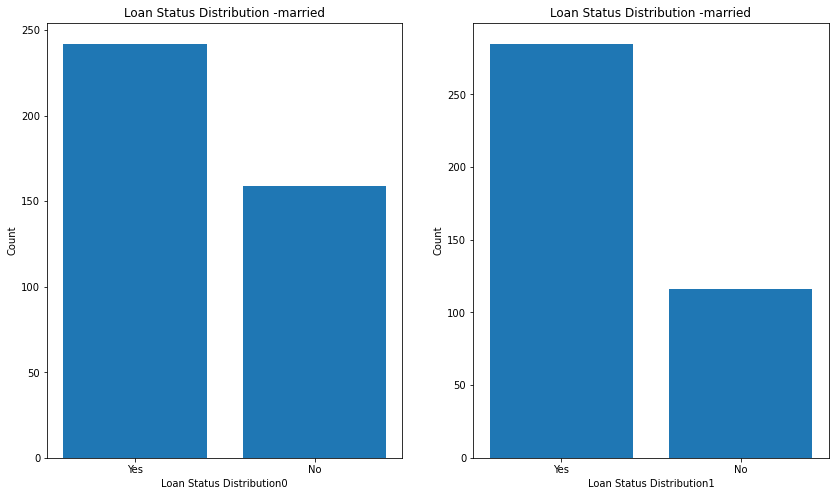

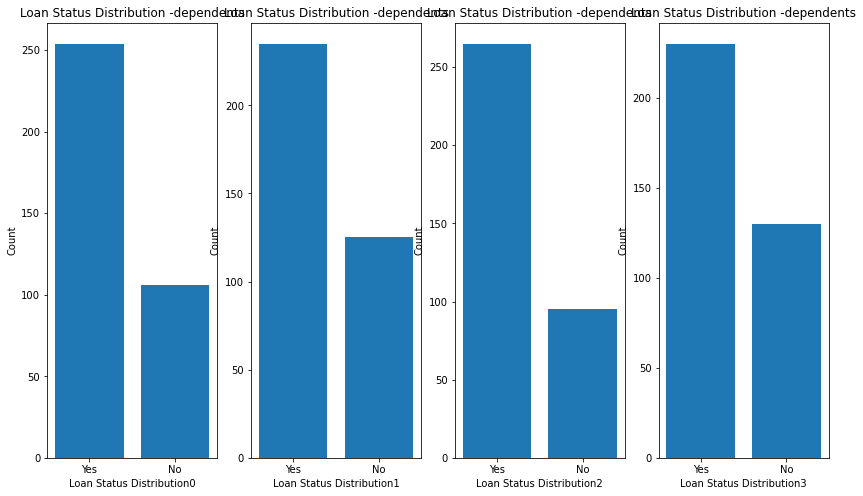

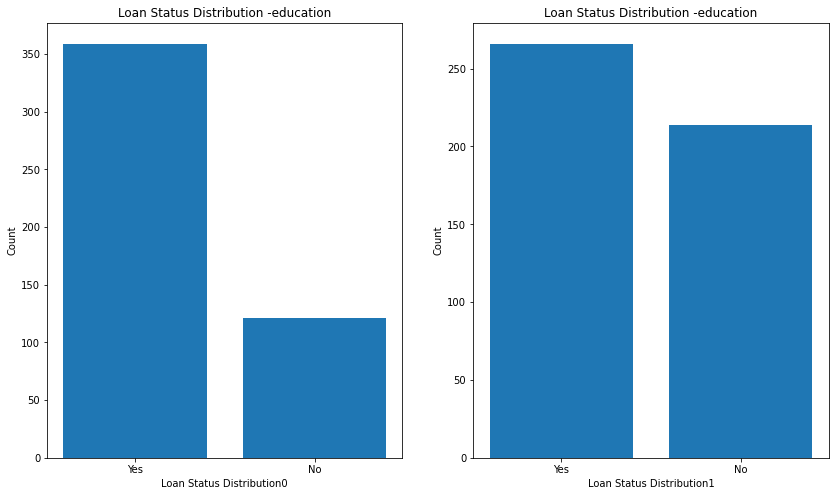

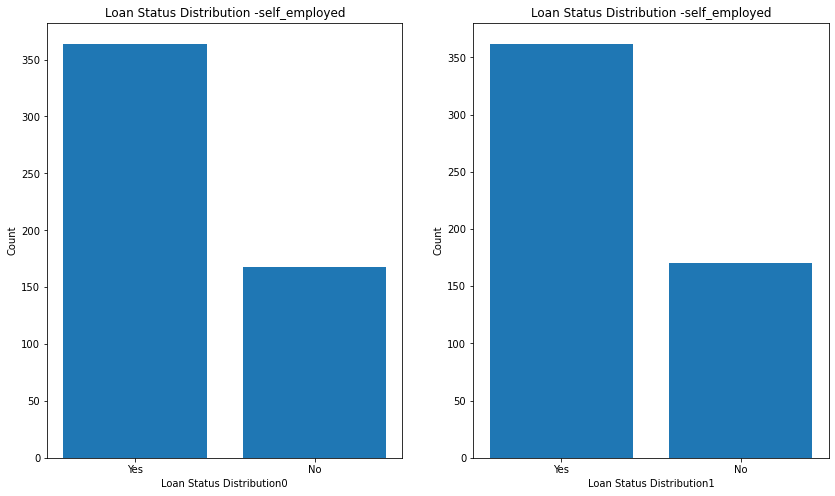

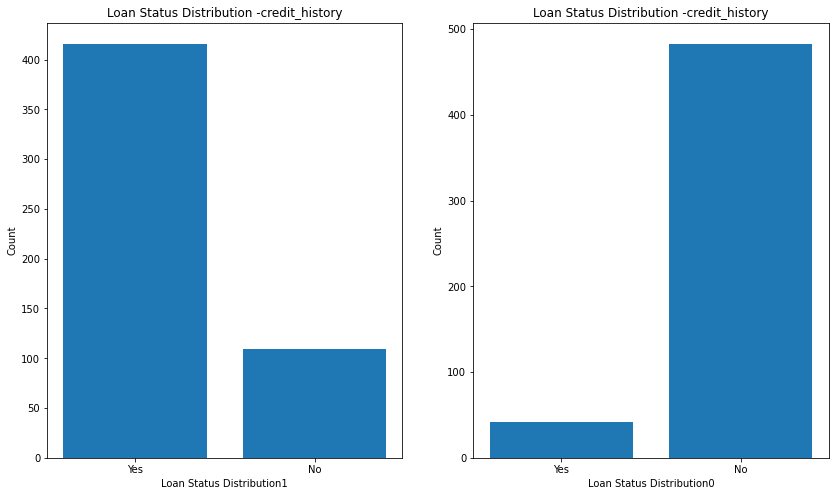

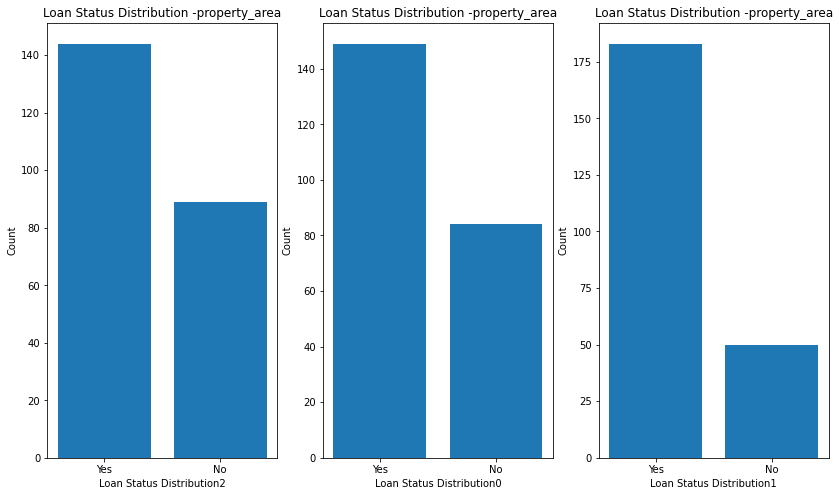

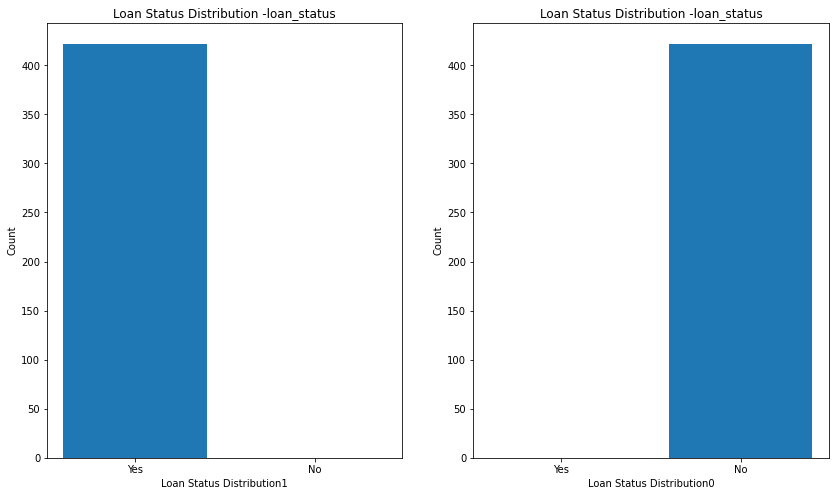

In [11]:

def plot_loan_status_distribution(data, variable):
    ctr =1 
    plt.figure(figsize=(14,8))
    for i in data[variable].unique():
        yes_counts = data['loan_status'][(data['loan_status'] == 1) & (data[variable] == i)].count()
        no_counts = data['loan_status'][(data['loan_status'] == 0) & (data[variable] == i)].count()
        counts = [yes_counts, no_counts]
        labels = ['Yes', 'No']
        plt.subplot(1,len( data[variable].unique()),ctr)
        plt.bar(labels, counts)
        plt.xlabel('Loan Status Distribution'+str(i))
        plt.ylabel('Count')
        plt.title('Loan Status Distribution -'+variable)
        ctr+=1
    
   
    # yes_counts = data['loan_status'][(data['loan_status'] == 1) & (variable == 0)].count()
    # no_counts = data['loan_status'][(data['loan_status'] == 0) &  (variable == 0)].count()
    # data = [yes_counts, no_counts]
    # labels = ['Yes', 'No']
    # plt.subplot(1, 2, 2)
    # plt.bar(labels, data)
    # plt.xlabel('Loan Status')
    # plt.ylabel('Count')
    # plt.title('Loan Status VS ' + title)
    # plt.show()








# Plot for male credit history



df = train_data.drop(columns=['applicantincome','coapplicantincome','loanamount','loan_amount_term'])




for i in df.columns:
    balanced_df = pd.DataFrame([],columns=df.columns)
    for j in df[i].unique():
        m =  max(df[i].value_counts().values)
        df1 =df[ (df[i]==j)].sample(m,random_state=45,replace=True)
        balanced_df = pd.concat([balanced_df,df1])
    plot_loan_status_distribution(balanced_df,i)




In [12]:
from sklearn.metrics import confusion_matrix
def train(df):
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1].values
    x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=1/3,random_state=40)
    models = {
    'LogisticRegression':LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'DecisionTreeClassifier':DecisionTreeClassifier()
    }
    
    ctr = 1
    plt.figure(figsize=(16,10))
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred =  model.predict(x_test)
        print(f"model :{name} score:{accuracy_score(y_test,y_pred)}") 
        print(confusion_matrix(y_test,y_pred))
        ctr+=1


In [13]:
train(train_data)

model :LogisticRegression score:0.7951219512195122
[[ 20  39]
 [  3 143]]
model :KNN score:0.6048780487804878
[[ 13  46]
 [ 35 111]]
model :DecisionTreeClassifier score:0.7170731707317073
[[ 29  30]
 [ 28 118]]


<Figure size 1152x720 with 0 Axes>

In [14]:
data = train_data
data_yes = data[(data['loan_status'] == 1)].sample(422,random_state=42,replace=True)
data_no = data[(data['loan_status'] == 0)].sample(422,random_state=42,replace=True)
balanced_data = pd.concat([data_yes,data_no])
balanced_data['loan_status']
train(balanced_data)
balanced_data

model :LogisticRegression score:0.7695035460992907
[[105  36]
 [ 29 112]]
model :KNN score:0.6950354609929078
[[ 95  46]
 [ 40 101]]
model :DecisionTreeClassifier score:0.8936170212765957
[[129  12]
 [ 18 123]]


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
151,1,1,0,0,1,2577,3750.0,152.0,360.0,1,0,1
504,1,1,0,1,0,3814,1483.0,124.0,300.0,1,1,1
390,1,0,3,0,0,9167,0.0,185.0,360.0,1,0,1
157,1,1,1,0,0,9538,0.0,187.0,360.0,1,2,1
109,1,1,3,1,0,2071,754.0,94.0,480.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,2,1,0,2281,0.0,113.0,360.0,1,0,0
489,1,0,0,0,0,2435,0.0,75.0,360.0,1,2,0
589,1,1,2,0,1,2726,0.0,106.0,360.0,0,1,0
186,1,1,1,0,1,2178,0.0,66.0,300.0,0,0,0


<Figure size 1152x720 with 0 Axes>

In [15]:
columns=['married','credit_history','applicantincome','loanamount','loan_amount_term','loan_status']
data  = balanced_data.loc[:,columns]
train(data)

model :LogisticRegression score:0.7269503546099291
[[ 92  49]
 [ 28 113]]
model :KNN score:0.7730496453900709
[[110  31]
 [ 33 108]]
model :DecisionTreeClassifier score:0.8900709219858156
[[129  12]
 [ 19 122]]


<Figure size 1152x720 with 0 Axes>

In [20]:
#best model


X  = data.iloc[:,:-1]
Y = data.iloc[:,-1]
model  = DecisionTreeClassifier().fit(X,Y)


In [21]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [26]:
model.predict([X.iloc[0,:]])

/home/ayoub/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])